# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [36]:
import math
import glob

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

from utils import get_dataset

%matplotlib inline

In [37]:
# dataset = get_dataset("/home/workspace/data/waymo/training_and_validation/*.tfrecord")
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [38]:
def display_images(batch):
    # Subplot layout
    total_subplots = len(batch)
    sp_per_row = 5 
    num_rows = math.ceil(total_subplots / sp_per_row)
    
    f, axs = plt.subplots(num_rows, sp_per_row,figsize=(15*sp_per_row,15*num_rows),
                         gridspec_kw={'width_ratios': [15 for i in range(sp_per_row)],
                                      'height_ratios': [15 for i in range(num_rows)],
                                      'wspace': 0.2,'hspace': 0.2})
    
    # color map 1:Vehicle 2:Pedestrian 4:Cyclist
    cmap = {1: 'r', 2: 'b', 4: 'g'}
    
    for idx, item in enumerate(batch):
        row, col = idx // sp_per_row, idx % sp_per_row
        ax = axs[row][col]
        
        # Draw img
        img = item['image']
        h, w = img.shape[0:2]
        ax.imshow(img)
        ax.axis('off')
        # Draw bboxes
        for gt_box, gt_class in zip (item['groundtruth_boxes'], item['groundtruth_classes']):
            y1,x1,y2,x2 = gt_box[0]* h, gt_box[1] * h, gt_box[2] * h, gt_box[3] * w
            ax.add_patch(patches.Rectangle((x1,y1),x2-x1,y2-y1, fc='none', ec=cmap[gt_class]))

    # plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

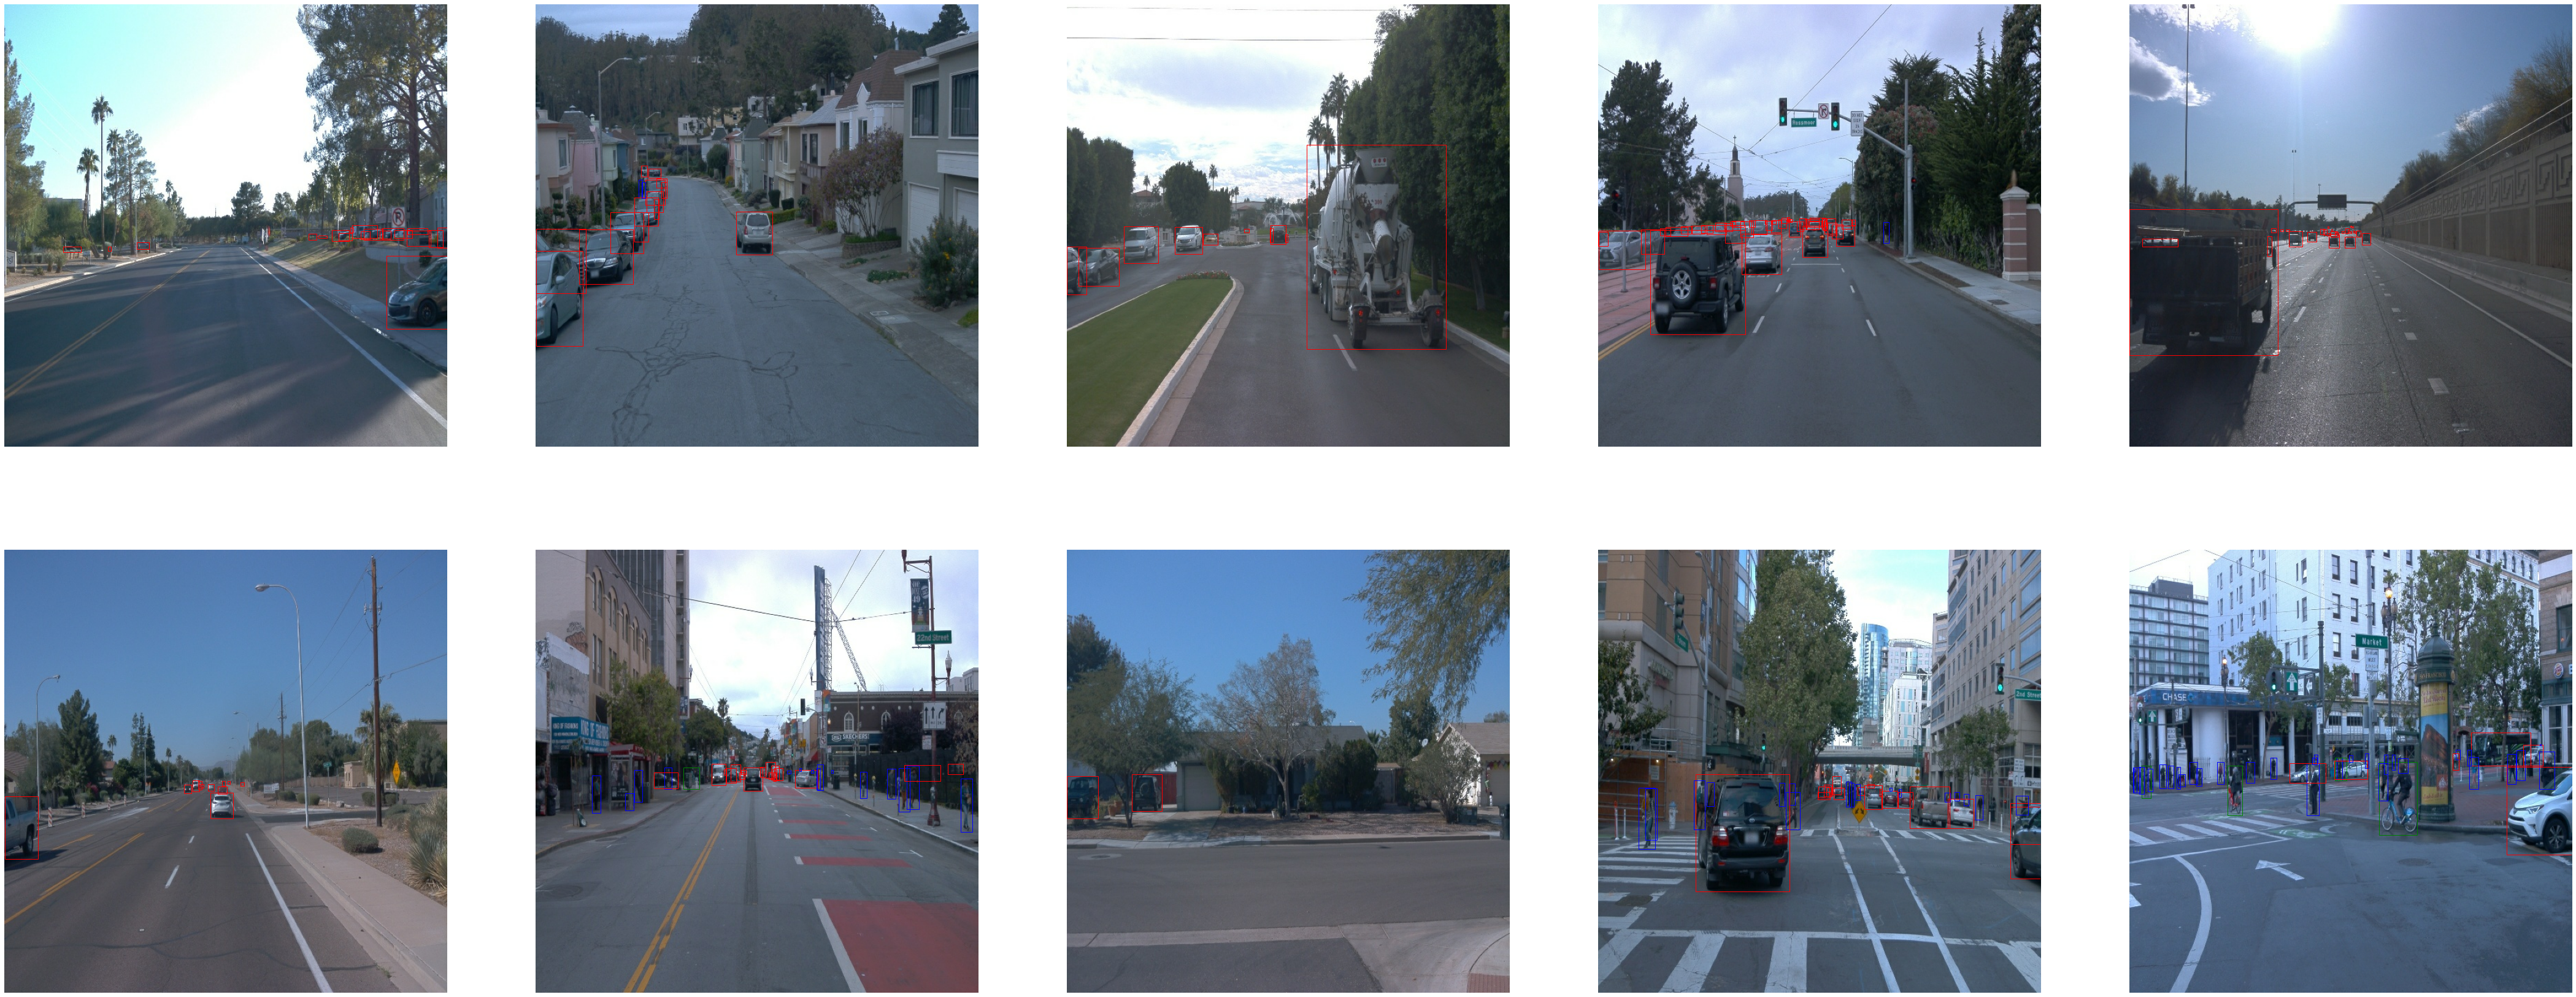

In [39]:
# Display 10 random images in dataset
batch = list(dataset.shuffle(2000).take(10).as_numpy_iterator())
# batch = list(dataset.take(20).as_numpy_iterator())
display_images(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

0 images out of 1500 processed
250 images out of 1500 processed
500 images out of 1500 processed
750 images out of 1500 processed
1000 images out of 1500 processed
1250 images out of 1500 processed


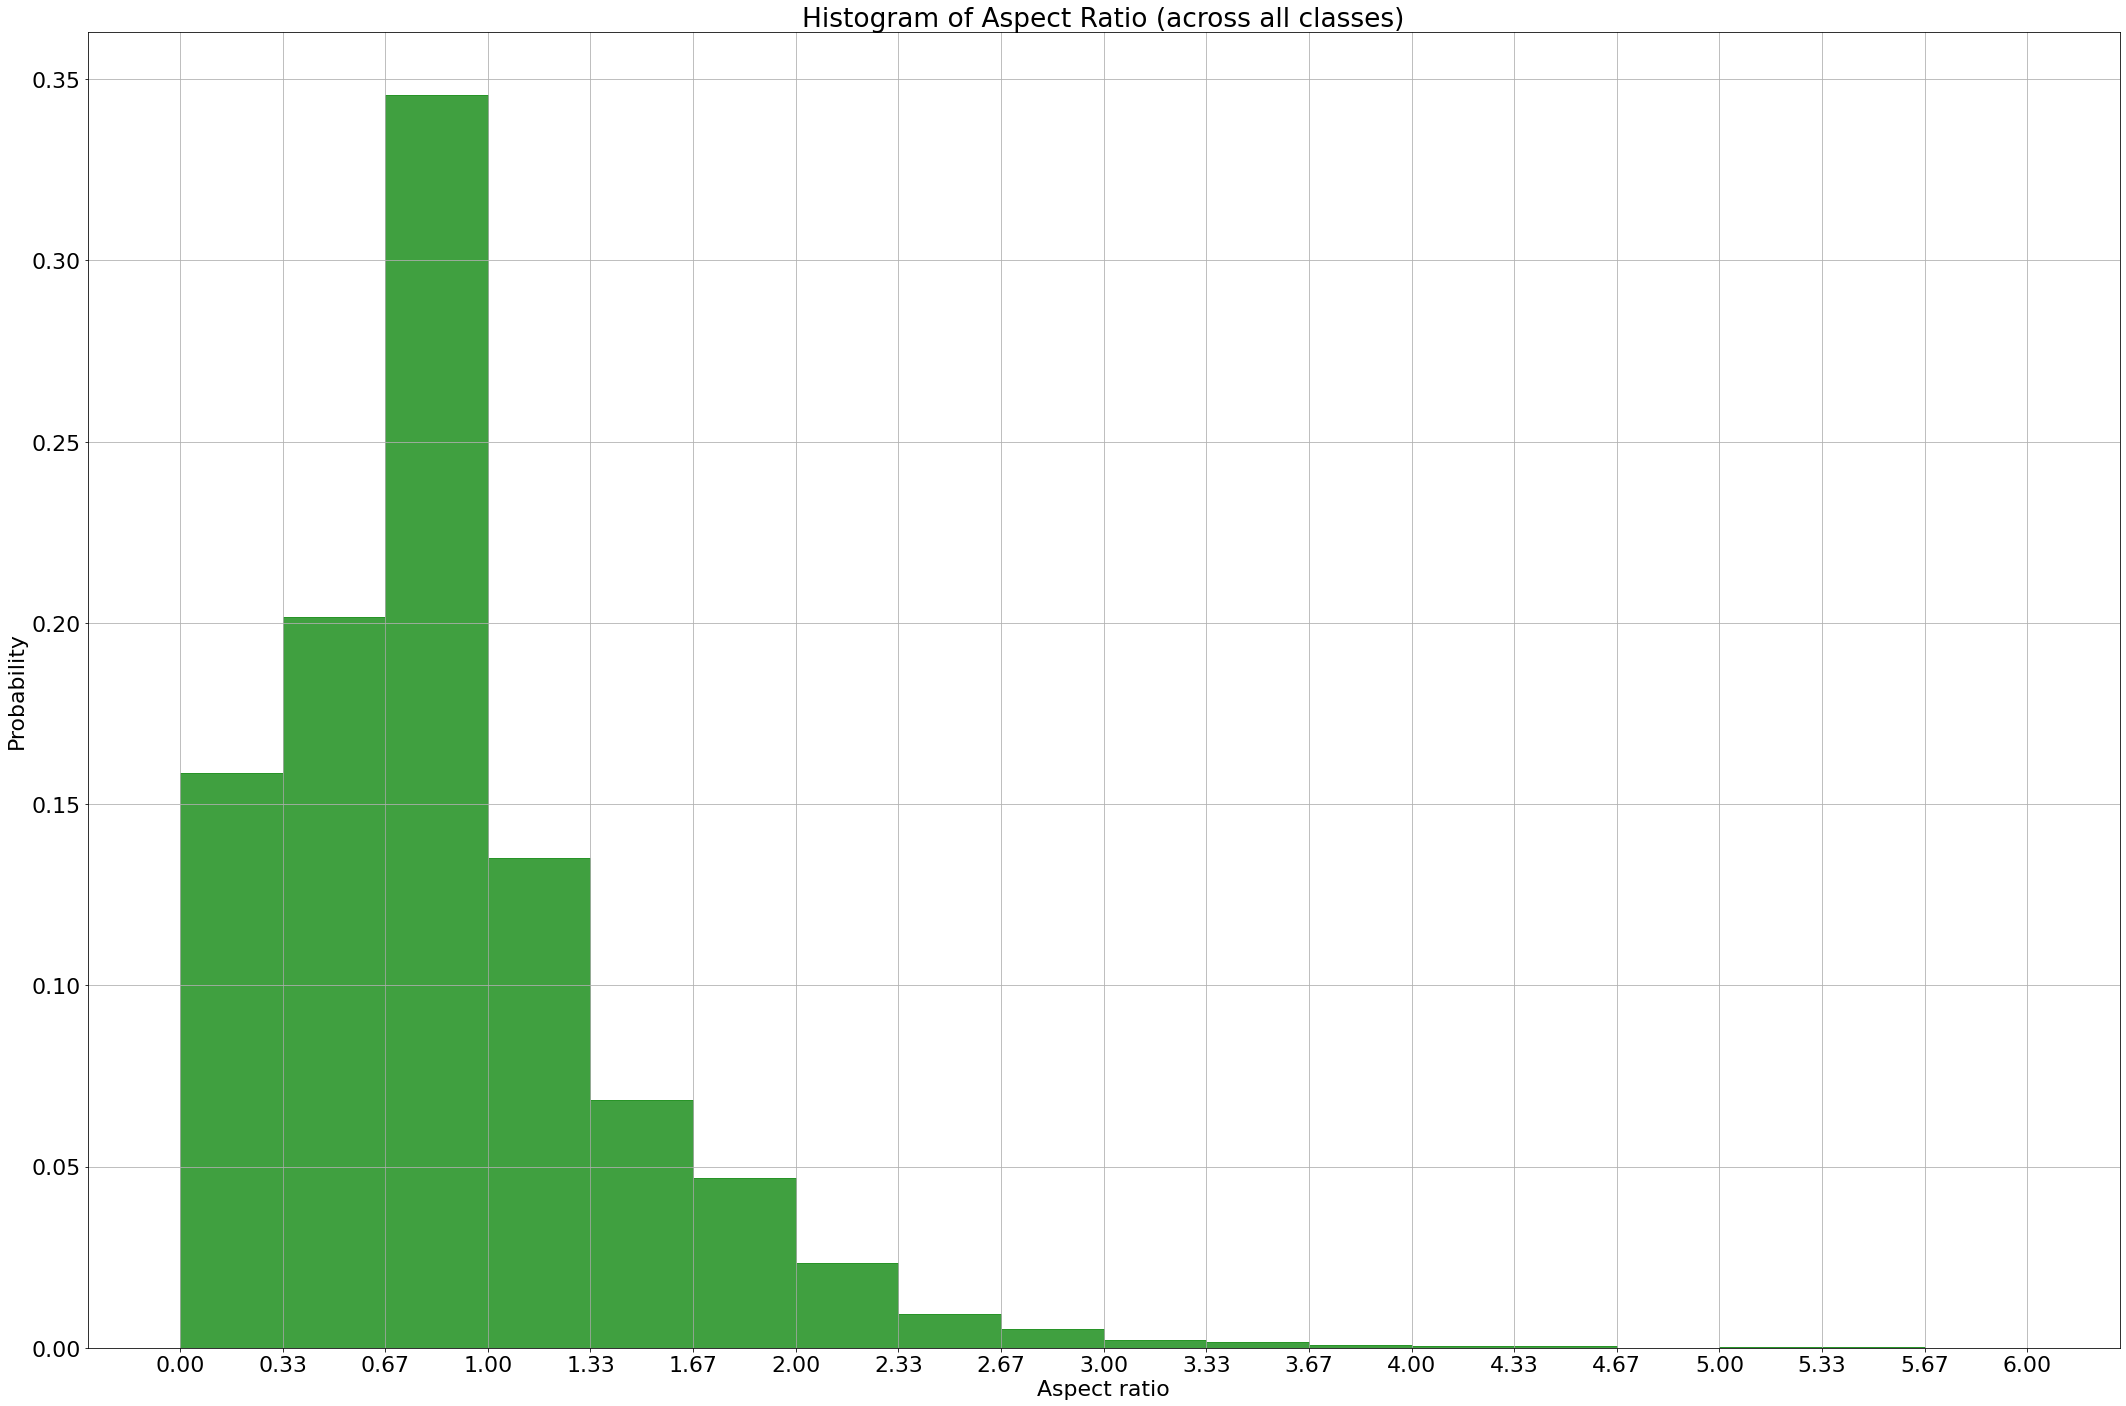

In [42]:
from matplotlib.ticker import FormatStrFormatter

# Compute distribution of aspect_ratios for bounding boxes
aspect_ratios = []
NUM_BATCHES = 150
random_batches = dataset.shuffle(2000).take(NUM_BATCHES)
for idx, batch in enumerate(random_batches):
    for images in dataset.take(10):
        boxes = images['groundtruth_boxes']
        ratios= abs(1.0 * boxes[:,3]-boxes[:,1]) / (boxes[:,2]-boxes[:,0])
        aspect_ratios.extend(ratios.numpy())
    
    if idx % 25 == 0:
        print (f"{idx*10} images out of {NUM_BATCHES*10} processed")


# Plot probability distribution
fig, ax = plt.subplots(figsize=(30,20))
plt.rcParams.update({'font.size': 22})
ax.hist(aspect_ratios, bins=6*3, range=(0,6), fc='g', ec='g', alpha=0.75, weights=np.ones(len(aspect_ratios))/len(aspect_ratios))
plt.title('Histogram of Aspect Ratio (across all classes)')
plt.grid(True)
plt.xlabel('Aspect ratio',fontsize=22)
plt.xticks(np.linspace(0,6,1+18), fontsize=22)
plt.xticks(fontsize=22)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.ylabel('Probability', fontsize=22)
plt.tight_layout()
plt.show()